In [3]:
!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display, clear_output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Defaulting to user installation because normal site-packages is not writeable


In [4]:
data =  pd.read_csv('activity_context_tracking_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205520 entries, 0 to 205519
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _id         205520 non-null  int64  
 1   orX         205520 non-null  int64  
 2   orY         205520 non-null  int64  
 3   orZ         205520 non-null  int64  
 4   rX          205520 non-null  float64
 5   rY          205520 non-null  float64
 6   rZ          205520 non-null  float64
 7   accX        205520 non-null  float64
 8   accY        205520 non-null  float64
 9   accZ        205520 non-null  float64
 10  gX          205520 non-null  float64
 11  gY          205520 non-null  float64
 12  gZ          205520 non-null  float64
 13  mX          205520 non-null  float64
 14  mY          205520 non-null  float64
 15  mZ          205520 non-null  float64
 16  lux         205520 non-null  int64  
 17  soundLevel  205520 non-null  float64
 18  activity    205520 non-null  object 
dtypes:

In [5]:
#dislays the data
data

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,1,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.681510,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,Sitting
1,2,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.681510,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,Sitting
2,3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,Sitting
3,4,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,Sitting
4,5,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.681510,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,Sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205515,205516,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205516,205517,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205517,205518,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205518,205519,288,4,-2,-0.066261,-0.039767,0.615725,-0.383072,-1.149220,10.61110,-0.203887,-1.62111,10.47650,31.6,12.4,-35.6,5000,59.40,DescendingStairs


In [6]:
data.head(5)

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,1,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.68151,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,Sitting
1,2,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.68151,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,Sitting
2,3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.68151,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,Sitting
3,4,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.68151,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,Sitting
4,5,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.68151,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,Sitting


In [7]:
data.tail(15)

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
205505,205506,285,7,-2,-0.065241,-0.042900,0.616016,-0.153229,-1.340750,10.2280,-0.143769,-1.69922,10.8198,29.6,12.8,-36.4,5000,59.71,DescendingStairs
205506,205507,285,7,-2,-0.065241,-0.042900,0.616016,-0.153229,-1.340750,10.2280,-0.143769,-1.69922,10.8198,29.6,12.8,-36.4,5000,59.71,DescendingStairs
205507,205508,285,7,-2,-0.065241,-0.042900,0.616016,-0.153229,-1.340750,10.2280,-0.143769,-1.69922,10.8198,29.6,12.8,-36.4,5000,59.71,DescendingStairs
205508,205509,283,8,-2,-0.067183,-0.043266,0.617256,-0.153229,-1.608900,10.2280,-0.165646,-1.72712,10.7521,30.0,12.8,-36.4,5000,59.71,DescendingStairs
205509,205510,283,8,-2,-0.067183,-0.043266,0.617256,-0.153229,-1.608900,10.2280,-0.165646,-1.72712,10.7521,30.0,12.8,-36.4,5000,59.01,DescendingStairs
205510,205511,283,8,-2,-0.067183,-0.043266,0.617256,-0.153229,-1.608900,10.2280,-0.165646,-1.72712,10.7521,30.0,12.8,-36.4,5000,59.01,DescendingStairs
205511,205512,283,8,-2,-0.067183,-0.043266,0.617256,-0.153229,-1.608900,10.2280,-0.165646,-1.72712,10.7521,30.0,12.8,-36.4,5000,59.01,DescendingStairs
205512,205513,283,8,-2,-0.068194,-0.043177,0.618287,-0.383072,-1.225830,10.6111,-0.181502,-1.72720,10.6531,30.4,12.8,-36.0,5000,59.01,DescendingStairs
205513,205514,283,8,-2,-0.068194,-0.043177,0.618287,-0.383072,-1.225830,10.6111,-0.181502,-1.72720,10.6531,30.4,12.8,-36.0,5000,59.01,DescendingStairs
205514,205515,283,8,-2,-0.068194,-0.043177,0.618287,-0.383072,-1.225830,10.6111,-0.181502,-1.72720,10.6531,30.4,12.8,-36.0,5000,60.07,DescendingStairs


### Dropping the '_id' column
This will ensure that duplicates are easy to spot
Because a different numerical id makes all rows unique, removing this exposes duplicate rows

In [8]:
data_without_id = data.drop(columns=['_id'])

### Finding duplicates

In [9]:
# Find duplicates
duplicates = data_without_id[data_without_id.duplicated(keep=False)]

# Display the duplicate rows
print("Duplicate Rows:")
duplicates

Duplicate Rows:


,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.681510,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,Sitting
1,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.681510,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,Sitting
2,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,Sitting
3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,Sitting
4,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.681510,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,Sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205515,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205516,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205517,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205518,288,4,-2,-0.066261,-0.039767,0.615725,-0.383072,-1.149220,10.61110,-0.203887,-1.62111,10.47650,31.6,12.4,-35.6,5000,59.40,DescendingStairs


### Dropping Duplicates

In [10]:
#dropping the duplicates and keeping the first occurrence
data_no_duplicates = data_without_id.drop_duplicates()

# Displaying the DataFrame without duplicates
print("Data without duplicates:")
data = data_no_duplicates.reset_index(drop=True) #also resetting index
data

Data without duplicates:


,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.681510,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,Sitting
1,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.681510,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,Sitting
2,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,Sitting
3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,Sitting
4,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.681510,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,Sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135046,283,8,-2,-0.067183,-0.043266,0.617256,-0.153229,-1.608900,10.22800,-0.165646,-1.72712,10.75210,30.0,12.8,-36.4,5000,59.01,DescendingStairs
135047,283,8,-2,-0.068194,-0.043177,0.618287,-0.383072,-1.225830,10.61110,-0.181502,-1.72720,10.65310,30.4,12.8,-36.0,5000,59.01,DescendingStairs
135048,283,8,-2,-0.068194,-0.043177,0.618287,-0.383072,-1.225830,10.61110,-0.181502,-1.72720,10.65310,30.4,12.8,-36.0,5000,60.07,DescendingStairs
135049,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs


## DESCRITIVE STATISTICS and EDA

### Importing Necessary Modules from eda.py

In [11]:
from eda import DescriptiveStatistics, DataVisualization
#Creating instance of DescriptiveStatistics Class
statistics = DescriptiveStatistics(data)
#Creating instance of the DataVisualization Class
dv = DataVisualization(data)

### Descriptive Statistics of the Dataset

1. Statistics for 'orX' column

In [12]:
# Print statistics for a specific column i.e 'orX' needs a variable name change
statistics.print_statistics('orX')

Mean of orX: 190.27375584038623
Median of orX: 187
Variance of orX: 6493.9534396104145
Standard Deviation of orX: 80.58506958246306
Root Mean Square of orX: 206.6350783415471
Interquartile Range of orX: 131
Coefficient of Variation of orX: 0.4235217265068492
Minimum of orX: 0
Maximum of orX: 359


 2. Statistics for 'orY' column

In [13]:
# Print statistics for 'orY' column
statistics.print_statistics('orY')

Mean of orY: 2.6499100339871604
Median of orY: 6
Variance of orY: 489.68485791608884
Standard Deviation of orY: 22.128824142192663
Root Mean Square of orY: 22.286921750304042
Interquartile Range of orY: 22
Coefficient of Variation of orY: 8.350783180701706
Minimum of orY: -178
Maximum of orY: 169


3. Covariance Between 'orX' and 'orY'

In [14]:
statistics.print_covariance('orX', 'orY')

Covariance between orX and orY: 496.752441141288


### A DROPDOWN GRAPHICAL USER INTERFACE FOR SELECTING A COLUMN FOR ANALYSIS

In [15]:
# Defining the list of column names
column_names = ['orX', 'orY', 'orZ', 'rX', 'rY', 'rZ', 'accX', 'accY', 'accZ', 'gX', 'gY', 'gZ', 'mX', 'mY', 'mZ', 'lux', 'soundLevel']

# Creating dropdown menu
dropdown = widgets.Dropdown(options = column_names)

# Creating output widget
output = widgets.Output()

# Function to print statistics when a column is selected
def print_statistics(column):
    with output:
        clear_output(wait=True)  # Clears previous output in the output widget
        print(f"Printing statistics for {column}\n")
        statistics.print_statistics(column)

# Linking the function to the dropdown so it is called when an option is selected
dropdown.observe(lambda change: print_statistics(change['new']), names='value')

# Displaying the dropdown and the output widget
display(dropdown, output)

Dropdown(options=('orX', 'orY', 'orZ', 'rX', 'rY', 'rZ', 'accX', 'accY', 'accZ', 'gX', 'gY', 'gZ', 'mX', 'mY',…

Output()

### A DROPDOWN GRAPHICAL USER INTERFACE FOR SELECTING TWO COLUMN FOR CALCULATING COVARIANCE

In [16]:
# Creating two dropdown menus
dropdown1 = widgets.Dropdown(options = column_names)
dropdown2 = widgets.Dropdown(options = column_names)

# Creating output widget
output = widgets.Output()

# Function to print covariance when two columns are selected
def print_covariance(change):
    with output:
        clear_output(wait=True)  # Clears previous output in the output widget
        print(f"Printing covariance for {dropdown1.value} and {dropdown2.value}")
        statistics.print_covariance(dropdown1.value, dropdown2.value)

# Linking the function to the dropdowns so it is called when an option is selected
dropdown1.observe(print_covariance, names='value')
dropdown2.observe(print_covariance, names='value')

# Displaying the dropdowns and the output widget
display(dropdown1, dropdown2, output)

Dropdown(options=('orX', 'orY', 'orZ', 'rX', 'rY', 'rZ', 'accX', 'accY', 'accZ', 'gX', 'gY', 'gZ', 'mX', 'mY',…

Dropdown(options=('orX', 'orY', 'orZ', 'rX', 'rY', 'rZ', 'accX', 'accY', 'accZ', 'gX', 'gY', 'gZ', 'mX', 'mY',…

Output()

### Comparing Results with Inbuilt .describe() Function

In [17]:
data.describe()

,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel
count,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000,135051.000000
mean,190.273756,2.649910,0.246803,-0.016580,-0.011332,0.043251,0.067343,-0.933185,9.652543,0.075299,-0.934956,9.661360,0.674376,-9.725638,-29.321806,6223.576575,54.249894
std,80.585368,22.128906,12.568666,0.147803,0.112946,0.789912,1.988329,2.486602,2.606599,1.851753,2.325984,2.038672,20.666463,20.495666,17.191185,4672.742216,7.499701
min,0.000000,-178.000000,-86.000000,-0.712191,-0.556955,-0.999912,-19.536700,-14.480100,-5.975930,-13.657700,-7.986420,-3.828100,-139.200000,-70.000000,-107.200000,0.000000,-26.570000
25%,140.000000,-4.000000,-4.000000,-0.093258,-0.099629,-0.866260,-0.574608,-3.485960,8.848970,-0.537913,-3.217810,9.390140,-15.200000,-26.000000,-40.800000,5000.000000,51.750000
50%,187.000000,6.000000,-1.000000,-0.025604,-0.010279,0.494533,0.076615,-0.995988,10.381300,0.038310,-0.944792,10.293400,5.600000,-8.000000,-32.400000,5000.000000,54.950000
75%,271.000000,18.000000,3.000000,0.023238,0.049952,0.793886,0.497994,0.727837,10.649400,0.385369,0.515777,10.649400,15.600000,6.000000,-15.200000,10000.000000,58.060000
max,359.000000,169.000000,88.000000,0.804160,0.723168,0.999904,15.859200,19.575000,19.575000,13.658400,9.895530,14.492300,78.800000,158.400000,77.200000,15000.000000,70.620000


### Comparing with Numpy math functions

In [18]:
def extract_features(data):
    dfs = []
    for col in data.columns[:-1]:
        grouped = data.groupby('activity')[col]
        df = pd.DataFrame({
            col + '_mean': grouped.mean(),
            col + '_std': grouped.std(),
            col + '_var': grouped.var(),
            col + '_median': grouped.median(),
            col + '_min': grouped.min(),
            col + '_max': grouped.max(),
            col + '_range': grouped.max() - grouped.min(),
            col + '_iqr': grouped.quantile(0.75) - grouped.quantile(0.25),
        })
        dfs.append(df)

    features = pd.concat(dfs, axis=1)
    return features.reset_index()
extract_features(data)

,activity,orX_mean,orX_std,orX_var,orX_median,orX_min,orX_max,orX_range,orX_iqr,orY_mean,...,lux_range,lux_iqr,soundLevel_mean,soundLevel_std,soundLevel_var,soundLevel_median,soundLevel_min,soundLevel_max,soundLevel_range,soundLevel_iqr
0,AscendingStairs,162.263899,105.676695,11167.563837,127.0,1,359,358,167.00,5.014085,...,14000,9000.0,59.250890,2.553594,6.520842,59.390,52.44,66.00,13.56,3.4400
1,ClimbingDownStairs,190.863541,66.464586,4417.541200,198.0,4,359,355,65.75,3.102740,...,9995,995.0,53.634410,4.989361,24.893723,53.270,41.76,70.02,28.26,4.2600
2,ClimbingUpStairs,165.084257,73.425665,5391.328274,159.0,1,358,357,92.00,3.261808,...,9995,995.0,52.603566,4.769844,22.751409,52.380,42.68,69.01,26.33,4.8350
3,DescendingStairs,225.375000,32.124199,1031.964141,215.0,171,288,117,40.00,5.252016,...,10000,0.0,59.416835,1.997944,3.991779,59.620,51.78,65.14,13.36,1.2900
4,Driving,90.248322,91.858342,8437.955039,68.0,2,358,356,82.00,14.807047,...,0,0.0,62.938591,1.715138,2.941699,63.260,58.13,67.20,9.07,2.1350
5,Jogging,204.492073,64.243247,4127.194814,189.0,61,355,294,118.00,10.176220,...,14000,10000.0,47.952119,27.662293,765.202478,57.405,-26.57,67.65,94.22,4.0200
6,Lying,165.853448,55.584725,3089.661692,178.0,1,359,358,38.00,-14.914624,...,4995,995.0,46.507099,5.328651,28.394526,45.140,40.48,68.18,27.70,7.7850
7,MountainAscending,196.679012,5.926270,35.120679,197.0,184,206,22,11.00,16.950617,...,0,0.0,50.956790,3.134133,9.822792,51.790,45.27,57.58,12.31,3.8300
8,MountainDescending,208.558908,36.441884,1328.010913,202.0,130,331,201,34.00,13.308908,...,0,0.0,54.465144,5.003644,25.036450,54.155,44.56,66.03,21.47,7.8025
9,Running,168.398200,38.413367,1475.586754,178.0,31,351,320,60.00,6.668166,...,14995,14995.0,60.651575,2.941826,8.654338,60.620,53.80,67.63,13.83,4.6700


### Exploratory Data Analysis of the Dataset

1. ACTIVITY DISTRIBUTION COUNT AND PLOT

In [19]:
activity_counts = data['activity'].value_counts()
print(activity_counts)

Sitting               48693
Walking               45729
Lying                 16199
Standing              11715
ClimbingUpStairs       3430
Jogging                3280
ClimbingDownStairs     1898
AscendingStairs        1349
Running                 889
MountainDescending      696
Driving                 596
DescendingStairs        496
MountainAscending        81
Name: activity, dtype: int64


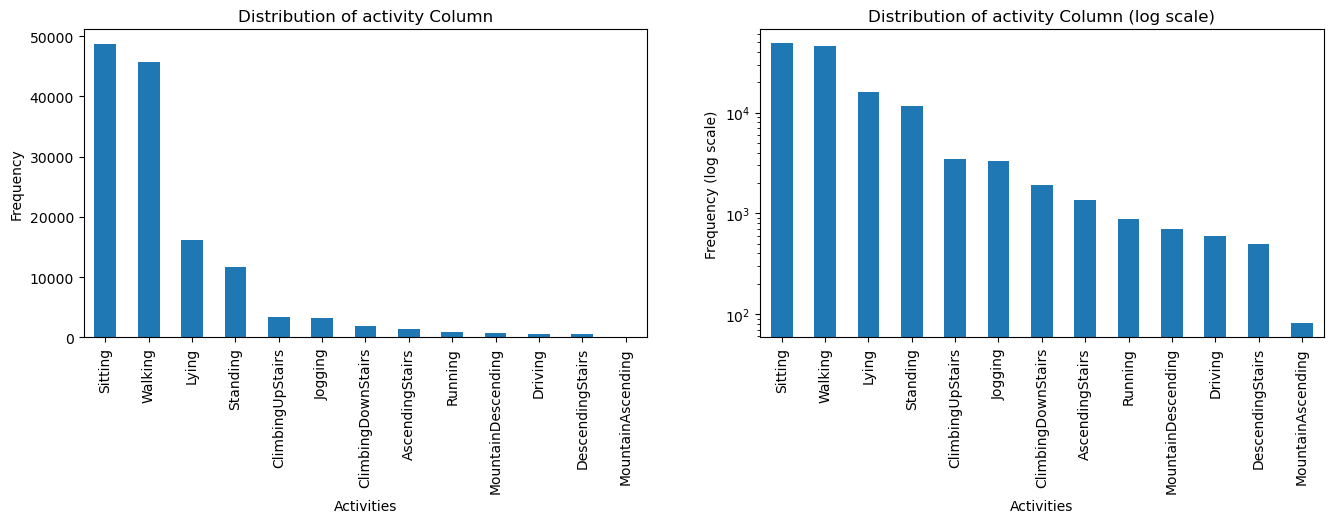

In [20]:
# plotting the distribution of activities
dv.activity_distribution()


             Skewness   Kurtosis
orX        -0.248030  -0.720849
orY        -3.197495  18.736902
orZ         2.044647  13.880079
rX          2.181281  11.057610
rY          0.466331   4.422647
rZ         -0.174201  -1.723231
accX        1.548632  10.695921
accY        0.599150   0.216531
accZ       -1.469217   5.489083
gX          2.121078  12.528832
gY          0.640470   0.393319
gZ         -3.672919  15.170927
mX         -0.593279   1.094163
mY          0.542694   2.962387
mZ          0.259306   0.438271
lux         0.508305  -0.650002
soundLevel -3.783910  37.645605


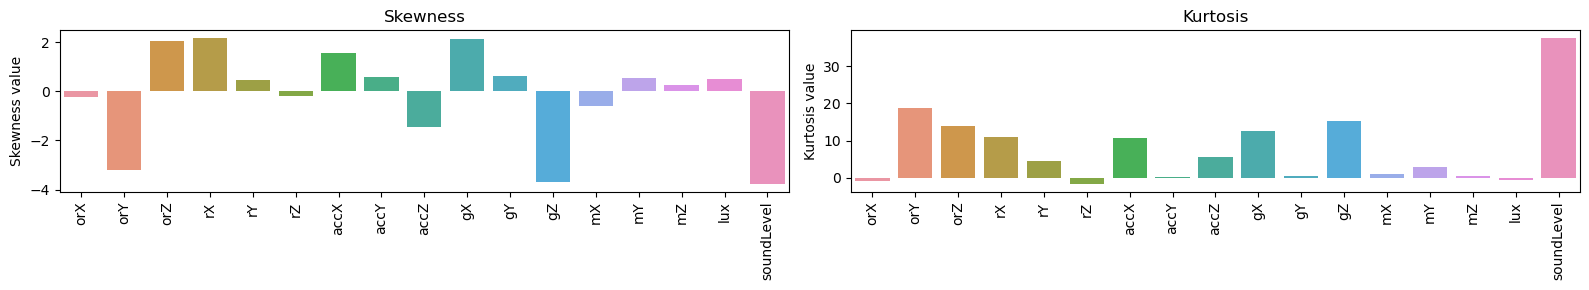

In [21]:
# plotting the skewness and kurtosis of all columns
dv.skew_kurt_analysis()

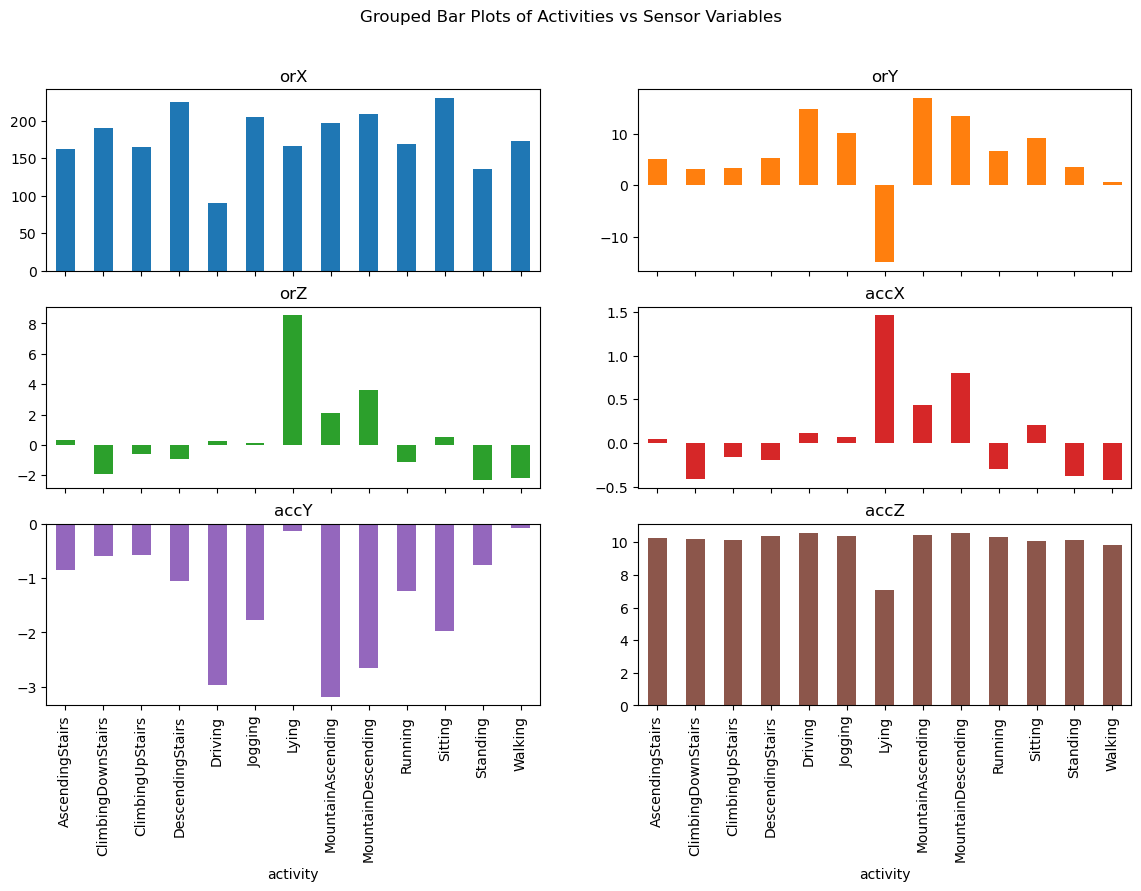

In [22]:
# plotting a grouped bar chat of selected columns
sensor_columns = ['orX', 'orY', 'orZ', 'accX', 'accY', 'accZ']
dv.activity_sensor_plot(sensor_columns)

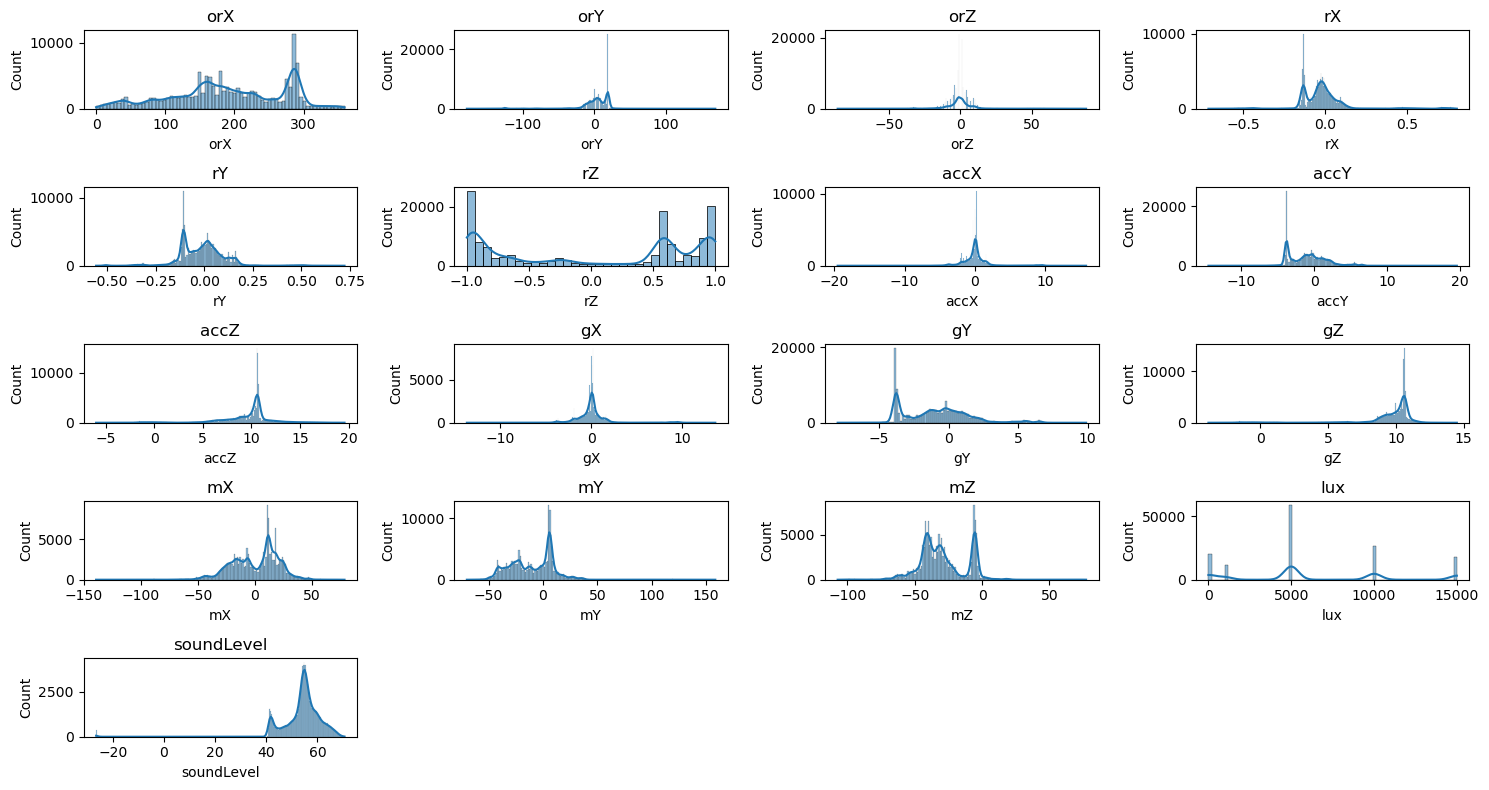

In [23]:
# plotting the histogram of each column
dv.plot_histograms()

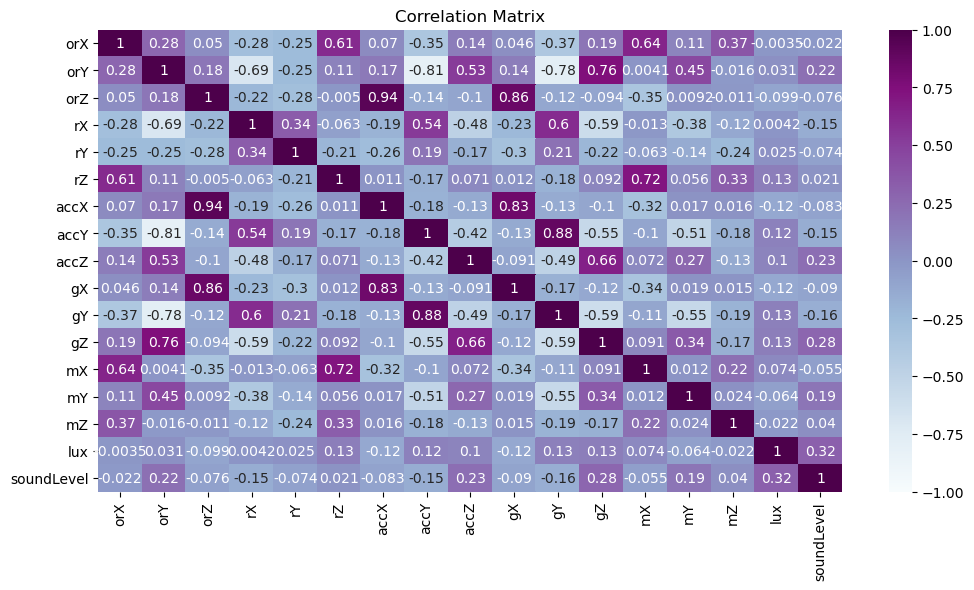

In [24]:
# plotting the correlation matrix of each column
dv.plot_correlation_matrix()

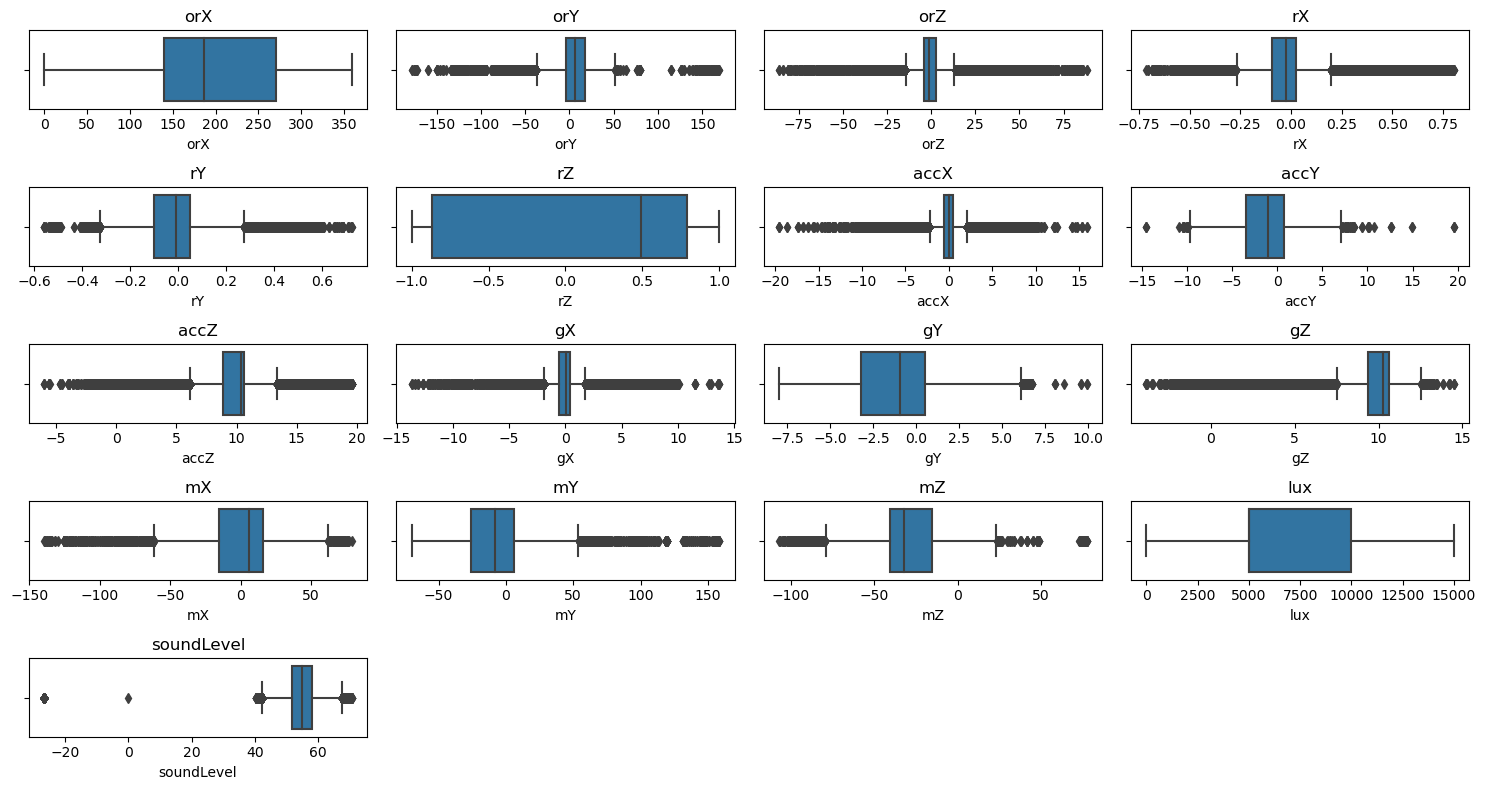

In [25]:
# plotting the box plot of each column
dv.plot_box_plots()

### Applying Oversampling & Undersampling to address Class Imbalance

In [26]:
target = 'activity'
desired_samples = 2000 # all activities less than 2000 will be increased while those above 2000 will be reduced

# Getting the unique categories and their counts
category_counts = data[target].value_counts()

# Initializing the RandomUnderSampler and RandomOverSampler
under_sampler = RandomUnderSampler(sampling_strategy={})
over_sampler = RandomOverSampler(sampling_strategy={})

# Looping through the categories and set the desired number of samples for under-sampling and over-sampling
for cat, count in category_counts.items():
    if count > desired_samples:
        under_sampler.sampling_strategy[cat] = desired_samples
    elif count < desired_samples:
        over_sampler.sampling_strategy[cat] = desired_samples

# Applying under-sampling to reduce the majority class samples
X_under, y_under = under_sampler.fit_resample(data.drop(target, axis=1), data[target])

# Combine the under-sampled data with the original category labels
data_under = pd.concat([X_under, y_under], axis=1)

# Applying over-sampling to increase the minority class samples
X_over, y_over = over_sampler.fit_resample(data_under.drop(target, axis=1), data_under[target])

# Combining the over-sampled data with the original category labels
balanced_data = pd.concat([X_over, y_over], axis=1)

### Displaying the Balanced Data

In [27]:
balanced_data

,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,180,5,5,0.020954,0.023406,-0.907566,0.995988,-0.881066,9.53850,-0.635426,-0.274916,11.00320,-4.4,-4.8,-43.6,1000,60.95,AscendingStairs
1,177,18,5,0.020214,0.032517,-0.920490,0.995988,-3.294420,9.53850,-0.685726,-0.484266,10.93880,-4.8,-4.4,-39.2,1000,61.22,AscendingStairs
2,181,29,8,0.011301,0.040083,-0.943788,0.995988,-3.485960,5.97593,-0.518575,-0.743196,10.85210,-4.8,-4.4,-39.2,1000,61.22,AscendingStairs
3,181,29,8,-0.004253,0.050908,-0.970155,2.221820,-1.685520,7.92960,-0.169701,-1.076860,10.62810,-4.4,-4.0,-37.2,1000,61.10,AscendingStairs
4,186,11,6,-0.022165,0.068499,-0.987529,1.187520,0.076615,9.73004,0.253606,-1.458920,10.20380,-4.0,-3.6,-36.0,1000,61.10,AscendingStairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,186,5,-7,0.022520,-0.027327,0.991749,2.375050,-0.919373,19.07700,0.526218,-0.498093,10.21170,9.6,-39.2,-32.4,5,61.42,Running
25996,153,33,17,0.104016,-0.022267,-0.875111,4.481950,-8.389280,11.87520,-1.546010,1.317050,9.38358,-26.8,-24.8,-28.0,15000,60.00,Running
25997,124,-2,-10,-0.018557,0.045741,-0.937552,-1.915360,0.536301,10.15140,0.035228,-1.053320,10.63620,-26.0,-23.2,-30.0,15000,56.33,Running
25998,116,-8,-41,-0.157752,0.153804,-0.943979,-5.171480,1.187520,5.82270,2.568320,-4.251280,10.43390,-26.8,-25.2,-32.4,15000,58.39,Running


In [28]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   orX         26000 non-null  int64  
 1   orY         26000 non-null  int64  
 2   orZ         26000 non-null  int64  
 3   rX          26000 non-null  float64
 4   rY          26000 non-null  float64
 5   rZ          26000 non-null  float64
 6   accX        26000 non-null  float64
 7   accY        26000 non-null  float64
 8   accZ        26000 non-null  float64
 9   gX          26000 non-null  float64
 10  gY          26000 non-null  float64
 11  gZ          26000 non-null  float64
 12  mX          26000 non-null  float64
 13  mY          26000 non-null  float64
 14  mZ          26000 non-null  float64
 15  lux         26000 non-null  int64  
 16  soundLevel  26000 non-null  float64
 17  activity    26000 non-null  object 
dtypes: float64(13), int64(4), object(1)
memory usage: 3.6+ MB


### TRAIN TEST SPLITTING

In [29]:
# splitting the balanced_data into training and test datasets
X = balanced_data.drop(target, axis=1)
y = balanced_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Applying StandardScaler to the data

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### TRAINING A DECISION TREE CLASSIFIER

In [31]:
# Creating a Decision Tree Classifier with a random state of 42 for reproducibility
dt_classifier = DecisionTreeClassifier(random_state=42)

# Recording the start time before fitting the model
start_time_dt = time.time()

# Fitting the Decision Tree Classifier to the training data
dt_classifier.fit(X_train, y_train)

# Recording the end time after the model has been fitted
end_time_dt = time.time()

# Calculating the time taken to fit the model
fit_time_dt = end_time_dt - start_time_dt

# Displaying the time taken to fit the model
print(f"Time taken to fit the Decision Tree Classifier: {fit_time_dt:.4f} seconds")

# Predicting the target values for the test data using the fitted model
y_pred_dt = dt_classifier.predict(X_test)

# Displaying the confusion matrix to evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Calculating the accuracy of the model's predictions
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Calculating the weighted precision of the model's predictions
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')

# Calculating the weighted recall of the model's predictions
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

# Calculating the weighted F1-score of the model's predictions
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Displaying the calculated evaluation metrics
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

Time taken to fit the Decision Tree Classifier: 0.6814 seconds
Confusion Matrix:
[[390   0   0   0   0   0   0   0   0   0   0   3   7]
 [  0 392   5   0   0   0   0   0   0   0   0   1   2]
 [  1  16 371   0   0   2   3   0   0   0   4   0   3]
 [  0   0   0 400   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 400   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0 386   0   0   1   0   3   0   8]
 [  0   3   3   0   0   0 387   0   0   0   5   2   0]
 [  0   0   0   0   0   0   0 400   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 397   0   0   0   3]
 [  0   0   0   0   0   0   0   0   0 400   0   0   0]
 [  3   1   1   0   0   0   0   0   0   0 383   9   3]
 [  5   2   1   2   0   2   0   0   0   1   3 377   7]
 [  6   4   4   5   2   9   2   1   6   3   5   8 345]]
Accuracy: 0.9669
Precision: 0.9668
Recall: 0.9669
F1-Score: 0.9667


### Training Support Vector Machine Classifier

In [32]:
# Creating a Support Vector Machine Classifier with a random state of 42 for reproducibility
svm_classifier = SVC(random_state=42)

# Recording the start time before fitting the model
start_time_svm = time.time()

# Fitting the SVM Classifier to the training data
svm_classifier.fit(X_train, y_train)

# Recording the end time after the model has been fitted
end_time_svm = time.time()

# Calculating the time taken to fit the model
fit_time_svm = end_time_svm - start_time_svm

# Displaying the time taken to fit the model
print(f"Time taken to fit the SVM Classifier: {fit_time_svm:.4f} seconds")

# Predicting the target values for the test data using the fitted model
y_pred_svm = svm_classifier.predict(X_test)

# Displaying the confusion matrix to evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Calculating the accuracy of the model's predictions
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Calculating the weighted precision of the model's predictions
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

# Calculating the weighted recall of the model's predictions
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Calculating the weighted F1-score of the model's predictions
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Displaying the calculated evaluation metrics
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")

Time taken to fit the SVM Classifier: 12.6289 seconds
Confusion Matrix:
[[375   0   1   0  10   0   0   0   0   0   0  11   3]
 [  0 359  32   0   0   2   0   0   0   0   0   7   0]
 [  4  38 350   0   0   2   0   0   0   0   0   2   4]
 [  0   0   0 400   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 400   0   0   0   0   0   0   0   0]
 [  1   2   3   2   0 373   0   1   5   9   0   0   4]
 [  0   0   1   0   0   0 389   0   0   0  10   0   0]
 [  0   0   0   0   0   0   0 400   0   0   0   0   0]
 [  0   0   0   0   0   2   0  34 363   0   0   0   1]
 [  0   0   0   0   0  12   0   0   0 388   0   0   0]
 [  1   4   9   7   3   2   2   0   0   0 355  17   0]
 [ 22   2   7   3   2   1   2   0   0   1   0 360   0]
 [ 19   4   7   5   1  18   1   3   7   3   1  13 318]]
Accuracy: 0.9288
Precision: 0.9303
Recall: 0.9288
F1-Score: 0.9284


### Training a Random Forest Classifier

In [33]:
# Creating a Random Forest Classifier with a random state of 42 for reproducibility
rf_classifier = RandomForestClassifier(random_state=42)

# Recording the start time before fitting the model
start_time_rf = time.time()

# Fitting the Random Forest Classifier to the training data
rf_classifier.fit(X_train, y_train)

# Recording the end time after the model has been fitted
end_time_rf = time.time()

# Calculating the time taken to fit the model
fit_time_rf = end_time_rf - start_time_rf

# Displaying the time taken to fit the model
print(f"Time taken to fit the Random Forest Classifier: {fit_time_rf:.4f} seconds")

# Predicting the target values for the test data using the fitted model
y_pred_rf = rf_classifier.predict(X_test)

# Displaying the confusion matrix to evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Calculating the accuracy of the model's predictions
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculating the weighted precision of the model's predictions
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')

# Calculating the weighted recall of the model's predictions
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Calculating the weighted F1-score of the model's predictions
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Displaying the calculated evaluation metrics
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Time taken to fit the Random Forest Classifier: 15.3886 seconds
Confusion Matrix:
[[398   0   0   0   0   0   0   0   0   0   0   0   2]
 [  0 398   1   0   0   0   0   0   0   0   0   0   1]
 [  0   2 398   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 400   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 400   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 398   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0 397   0   0   0   3   0   0]
 [  0   0   0   0   0   0   0 400   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 400   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0 399   0   0   0]
 [  0   0   1   0   1   0   0   0   0   0 392   6   0]
 [  1   2   0   0   0   1   1   0   0   0   1 393   1]
 [  3   2   7   1   0   6   1   1   5   1   1   6 366]]
Accuracy: 0.9883
Precision: 0.9883
Recall: 0.9883
F1-Score: 0.9882


### Training a Multi-Layer Perceptron Neural Network

In [34]:
# Initializing a Multi-Layer Perceptron (MLP) Classifier with two hidden layers, each with 100 neurons. 
# Setting the random state to 42 for reproducibility
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)

# Recording the start time before fitting the model
start_time_mlp = time.time()

# Fitting the MLP Classifier to the training data
mlp_classifier.fit(X_train, y_train)

# Recording the end time after the model has been fitted
end_time_mlp = time.time()

# Calculating the time taken to fit the model
fit_time_mlp = end_time_mlp - start_time_mlp

# Displaying the time taken to fit the model
print(f"Time taken to fit the MLP Classifier: {fit_time_mlp:.4f} seconds")

# Predicting the target values for the test data using the fitted model
y_pred_mlp = mlp_classifier.predict(X_test)

# Displaying the confusion matrix to evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

# Calculating the accuracy of the model's predictions
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Calculating the weighted precision of the model's predictions
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')

# Calculating the weighted recall of the model's predictions
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')

# Calculating the weighted F1-score of the model's predictions
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

# Displaying the calculated evaluation metrics
print(f"Accuracy: {accuracy_mlp:.4f}")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")
print(f"F1-Score: {f1_mlp:.4f}")

Time taken to fit the MLP Classifier: 92.2156 seconds
Confusion Matrix:
[[397   0   0   0   0   0   0   0   0   0   0   0   3]
 [  0 397   2   0   0   0   0   0   0   0   1   0   0]
 [  0   1 397   0   0   0   0   0   0   0   1   0   1]
 [  0   0   0 400   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 400   0   0   0   0   0   0   0   0]
 [  2   2   0   0   0 390   0   0   1   1   0   0   4]
 [  0   0   0   0   0   0 400   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 400   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 398   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0 399   0   0   1]
 [  0   1   0   0   0   0   1   0   0   0 393   4   1]
 [  1   2   0   0   0   0   1   0   0   1   1 391   3]
 [  5   2   4   2   1  10   0   1   7   1   4   7 356]]
Accuracy: 0.9842
Precision: 0.9841
Recall: 0.9842
F1-Score: 0.9840


### Comparing Time To Train Each Model

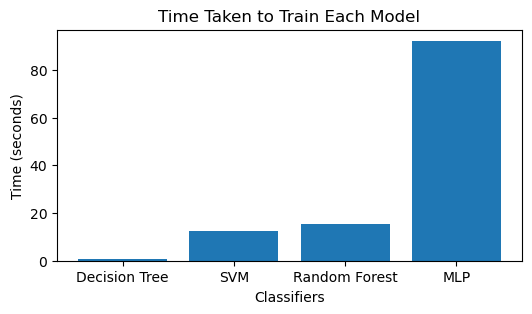

In [35]:
classifier_names = ['Decision Tree', 'SVM', 'Random Forest', 'MLP']
fit_times = [fit_time_dt, fit_time_svm, fit_time_rf, fit_time_mlp]

plt.figure(figsize=(6, 3))
plt.bar(classifier_names, fit_times)
plt.xlabel('Classifiers')
plt.ylabel('Time (seconds)')
plt.title('Time Taken to Train Each Model')
plt.show()

#### Comparing the Evaluation Metrics of Each Model

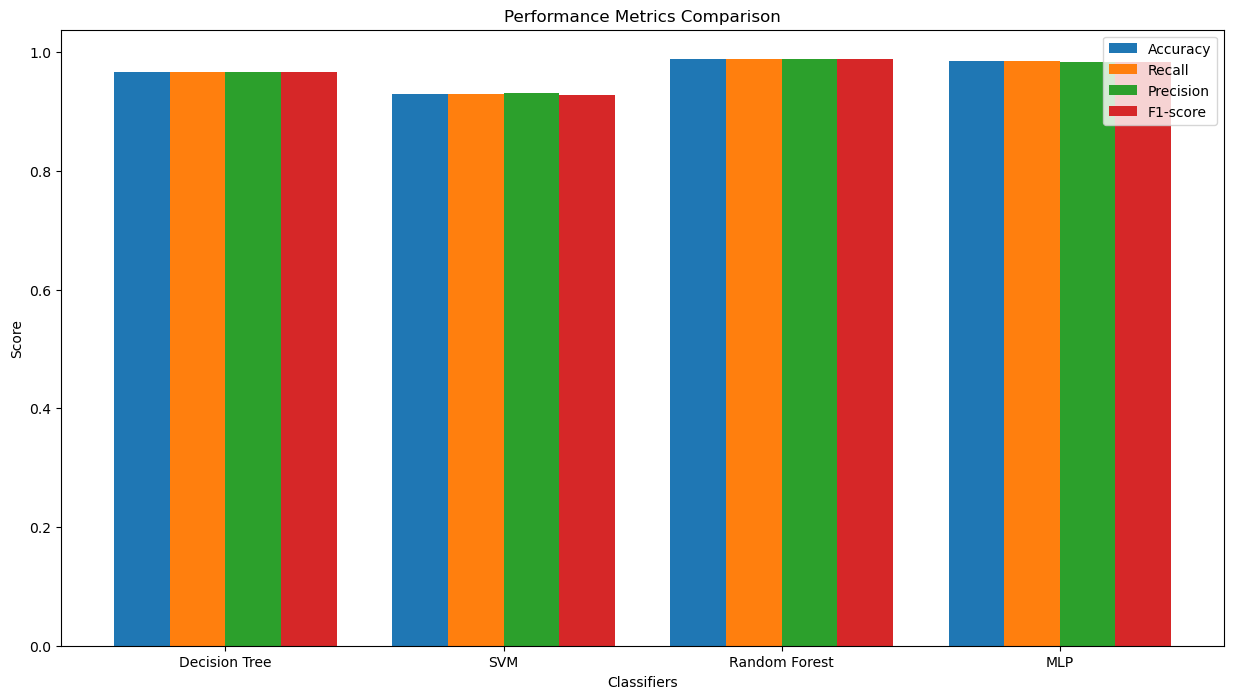

In [36]:
accuracies = [accuracy_dt, accuracy_svm, accuracy_rf, accuracy_mlp]
recalls = [recall_dt, recall_svm, recall_rf, recall_mlp]
precisions = [precision_dt, precision_svm, precision_rf, precision_mlp]
f1_scores = [f1_dt, f1_svm, f1_rf, f1_mlp]

plt.figure(figsize=(15, 8))
x = classifier_names
width = 0.2

plt.bar([i - width*1.5 for i in range(len(accuracies))], accuracies, width=width, label='Accuracy')
plt.bar([i - width/2 for i in range(len(recalls))], recalls, width=width, label='Recall')
plt.bar([i + width/2 for i in range(len(precisions))], precisions, width=width, label='Precision')
plt.bar([i + width*1.5 for i in range(len(f1_scores))], f1_scores, width=width, label='F1-score')

plt.xticks(range(len(accuracies)), classifier_names)
plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.show()

### Maually testing the Model
        ...with already trained Random Forest model (rf_classifier) and preprocessed data with StandardScaler (scaler)

In [37]:
# Providing a sample sensors reading values as a comma-separated list
user_input = '1.235,0.562,-0.789,0.034,0.197,-0.319,9.852,0.234,-1.046,0.012,0.087,-0.068,12.345,-23.456,42.123,675.0,57.32'

# Converting the input string into a list of numbers
input_values = [float(value.strip()) for value in user_input.split(',')]

original_columns = ['orX', 'orY', 'orZ', 'rX', 'rY', 'rZ', 'accX', 'accY', 'accZ', 'gX', 'gY', 'gZ', 'mX', 'mY', 'mZ', 'lux', 'soundLevel']

# Creating a DataFrame from input_values
input_df = pd.DataFrame([input_values], columns=original_columns)

# Scaling the input data using the StandardScaler
scaled_input = scaler.transform(input_df)

# Predicting the activity using the Random Forest model
predicted_activity = rf_classifier.predict(scaled_input)

print(f"The predicted activity is: {predicted_activity[0]}")

The predicted activity is: Lying
